### Import the needed package

In [13]:
# package for handling the custom scripts
import sys
sys.path.insert(0, "./../")

# package for handling the file and directory
import os
# the custom package for handling the data
import utilities as utils
# package for handling the visualization
import matplotlib.pyplot as plt
# package for handling the environment variables
from dotenv import load_dotenv
from random import randint

# load the environment variables
load_dotenv()

True

### Global variable

In [2]:
path_full = os.environ.get("ORI_PATH")
path_data = os.path.join(path_full, "datasets", "cleaned")
path_img = os.path.join(path_data, "fundus_image")
path_mask = os.path.join(path_data, "mask_image")
path_aug = os.path.join(path_data, "aug_image")

### Create the destination directory

In [3]:
try:
    os.mkdir(path_aug)
except FileExistsError:
    print("folder already exists")

folder already exists


### Get all the files

In [4]:
images = os.listdir(path_img)
masks = os.listdir(path_mask)

### Visualize the clahe image

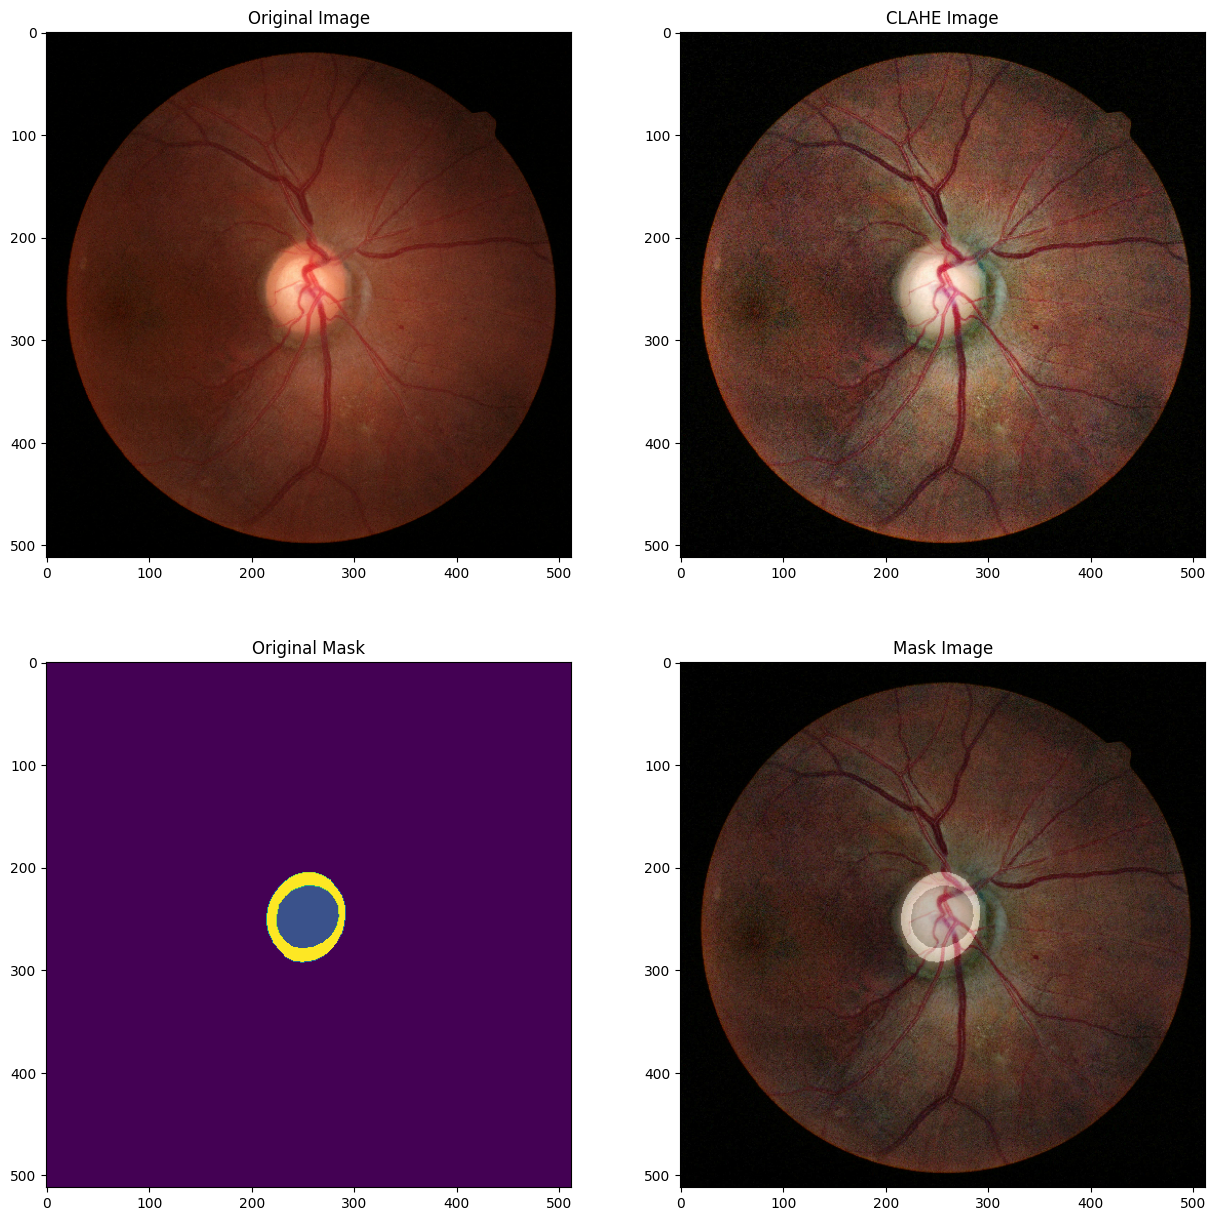

In [33]:
# main variables
clip_limit = 2.
rand_index = randint(0, len(images) - 1)
# Get the sample image and mask
sample_img = utils.get_file(images[rand_index], path_img, "image")
sample_mask = utils.get_file(masks[rand_index], path_mask, "mask")
# implement the CLAHE
clahe_image = utils.augment_clahe(sample_img, clip_limit)

# Plot the image and mask
plt.figure(figsize=(15, 15))

for index, (picture, title) in enumerate(zip([sample_img, clahe_image, sample_mask],
                                            ["Original Image", "CLAHE Image", "Original Mask"])):
    plt.subplot(2, 2, index + 1)
    plt.imshow(picture)
    plt.title(title)

# Visualize the mask image
plt.subplot(2, 2, 4)
plt.imshow(clahe_image)
plt.imshow(sample_mask, cmap="gray", alpha=0.3)
plt.title("Mask Image")

plt.show()

### Create the augmentation images

In [34]:
utils.create_aug_img(images, path_img, path_aug, clip_limit)